In [2]:
import pandas as pd
top50_df = pd.read_csv("top10s_2010_2019.csv", encoding='latin-1')
top50_df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [3]:
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Intercept: 
 81.69321508285175
Coefficients: 
 [ 0.00771593 -0.19114508  0.08881182  1.28081356 -0.0622833   0.00709026
 -0.02003633 -0.01904194]
                            OLS Regression Results                            
Dep. Variable:                    pop   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     5.178
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           2.89e-06
Time:                        09:07:38   Log-Likelihood:                -2448.0
No. Observations:                 603   AIC:                             4914.
Df Residuals:                     594   BIC:                             4954.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.0

C:\Users\mleegan\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


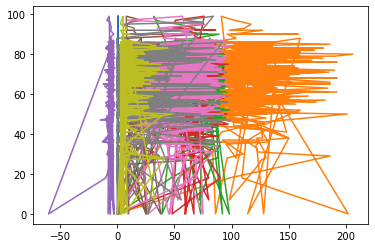

In [4]:
## not scaled

X = top50_df[['bpm', 'nrgy', 'dnce', 'dB',
                'live', 'val', 'acous', 'spch'
                  ]]
Y = top50_df['pop']

regr = linear_model.LinearRegression()
regr.fit(X,Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

plt.plot(X, Y)
plt.show()

Intercept: 
 66.52072968490879
Coefficients: 
 [ 0.19116047 -3.1151171   1.18720269  3.58076947 -0.8153926   0.15949074
 -0.41573264 -0.1423757 ]
                                 OLS Regression Results                                
Dep. Variable:                    pop   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):             -0.010
Method:                 Least Squares   F-statistic:                             0.2207
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                       0.987
Time:                        09:08:21   Log-Likelihood:                         -3399.8
No. Observations:                 603   AIC:                                      6816.
Df Residuals:                     595   BIC:                                      6851.
Df Model:                           8                                                  
Covariance Type:            nonrobust                         

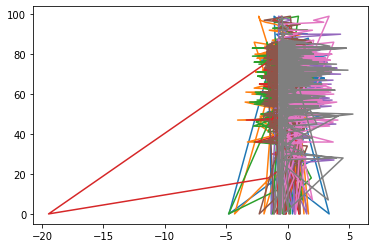

In [5]:
## scaled

X = top50_df[['bpm', 'nrgy', 'dnce', 'dB',
                'live', 'val', 'acous', 'spch'
                  ]]
Y = top50_df['pop']

X_scaled = StandardScaler().fit_transform(X)

regr = linear_model.LinearRegression()
regr.fit(X_scaled,Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X_scaled) # adding a constant
 
model = sm.OLS(Y, X_scaled).fit()
predictions = model.predict(X_scaled) 
 
print_model = model.summary()
print(print_model)

plt.plot(X_scaled, Y)
plt.show()